# Sinh viên 1: Nguyễn Mậu Trọng Hiếu - 20120081 (siu vjp pro)
# ...
# Lớp 20TN

In [1]:
# import libraries
import os
import shutil
import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from test_primarily import *
from Lucas import Baillie_PSW_Test

True


In [3]:
# generated test will be stored in this folder
route_test = "generated_test"

try:
    shutil.rmtree(route_test)
except:
    pass

try:
    os.mkdir(route_test)
except:
    pass

SEED = 42
random.seed(SEED)

In [4]:
# trick to count number of comparisons
def inc(x):
    x[0] = x[0] + 1
    return True

def measure_time(func, *args):
    start = time.time()
    results = func(*args)
    end = time.time()
    return end - start, results

def plot_run_times(run_times, steps):
    x = steps
    for algorithm, run_time in run_times.items():
        plt.plot(x, run_time, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Run Time (Seconds)')
    plt.legend()
    plt.show()

def plot_comparisons(comparisons, steps):
    x = steps
    for algorithm, comparison in comparisons.items():
        plt.plot(x, comparison, label=algorithm)
    plt.xlabel('Input Size (Number of Digits)')
    plt.ylabel('Number of Comparisons')
    plt.legend()
    plt.show()

In [5]:
from sympy import randprime
from sympy.ntheory import isprime
from random import randint
def generate_random_number(n_digits):
    return random.randint(10**(n_digits - 1), 10**n_digits)

def generate_random_large_number(n_digit):
    lower = 10 ** (n_digit - 1)
    upper = (10 ** n_digit) - 1
    number = randprime(lower, upper)
    while randint(0, 1): # hoặc là trả về một hợp số với số nguyên tố lớn
        number *= randprime(lower, upper)
    
    return number

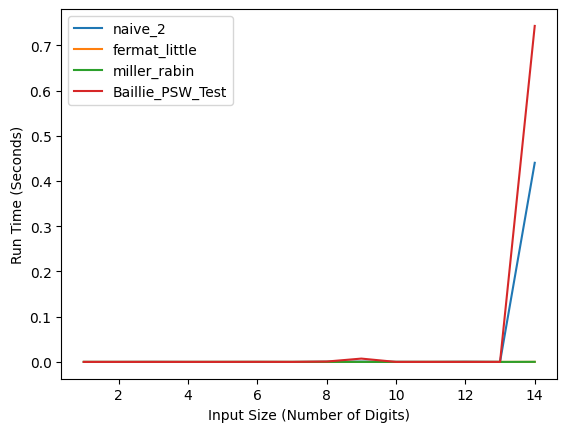

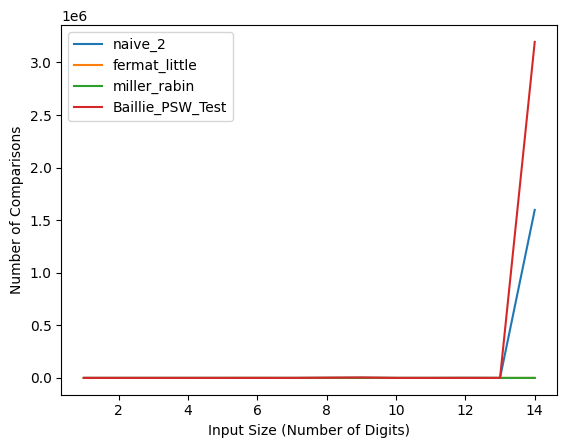

In [6]:
list_of_algo = [naive_2, fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}

# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(1, 15, 1)
n_repeat = 10
for n_digt in n_digts:
    for repeat in range(n_repeat):
        save_path = os.path.join(route_test, f'test_case_{n_digt}_digit_{repeat}_repeat.txt')
        with open(save_path, 'w') as f:
            number = generate_random_number(n_digt)
            f.write('Input: ' + str(number) + '\n')

            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                # print(func.__name__, ':', run_time, 's')
                try:
                    run_times[func.__name__][repeat].append(run_time)
                    comparisons_count[func.__name__][repeat].append(comparisons)
                except:
                    run_times[func.__name__][repeat] = [run_time]
                    comparisons_count[func.__name__][repeat] = [comparisons]
                check_ans.append(results)

            # Kiểm tra đáp án của các thuật toán có giống nhau không
            # assert check_ans.count(check_ans[0]) == len(check_ans), 'Các thuật toán không trả về đáp án giống nhau'            

avg_run_times = {}
avg_comparisons_count = {}

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts)
plot_comparisons(avg_comparisons_count, n_digts)


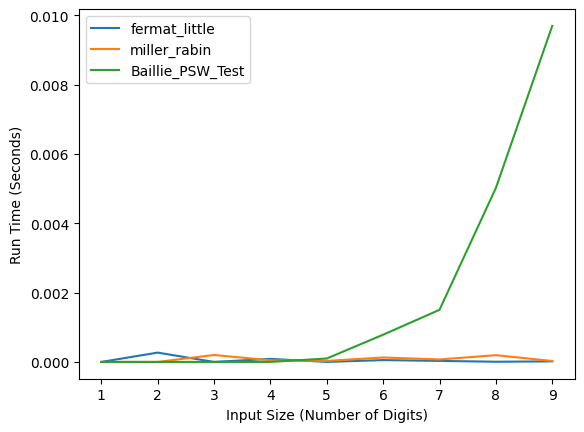

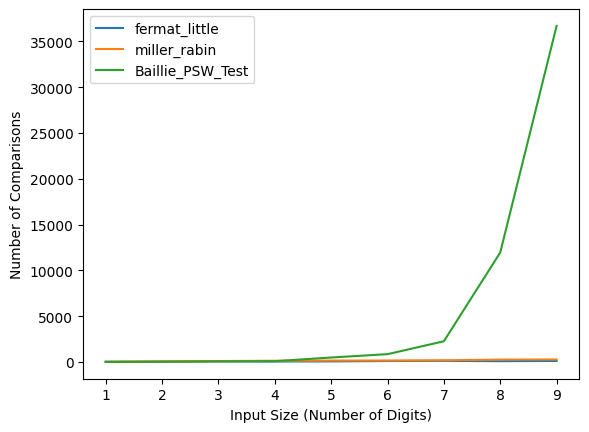

In [14]:
list_of_algo = [fermat_little, miller_rabin, Baillie_PSW_Test]
run_times = {}
comparisons_count = {}

# init dictionary
for func in list_of_algo:
    run_times[func.__name__] = {}
    comparisons_count[func.__name__] = {}

n_digts = range(1, 10, 1)
n_repeat = 10
for n_digt in n_digts:
    for repeat in range(n_repeat):
        save_path = os.path.join(route_test, f'test_case_{n_digt}_digit_{repeat}_repeat.txt')
        with open(save_path, 'w') as f:
            number = generate_random_large_number(n_digt)
            f.write('Input: ' + str(number) + '\n')

            check_ans = []
            for func in list_of_algo:
                run_time, results = measure_time(func, number)
                results, comparisons = results
                # print(func.__name__, ':', run_time, 's')
                try:
                    run_times[func.__name__][repeat].append(run_time)
                    comparisons_count[func.__name__][repeat].append(comparisons)
                except:
                    run_times[func.__name__][repeat] = [run_time]
                    comparisons_count[func.__name__][repeat] = [comparisons]
                check_ans.append(results)
            check_ans.append(isprime(number))
            check_ans.append(number)
                
                

            if check_ans[-2] != check_ans[-3]:
                print(check_ans)
            # Kiểm tra đáp án của các thuật toán có giống nhau không
            # assert check_ans.count(check_ans[0]) == len(check_ans), 'Các thuật toán không trả về đáp án giống nhau'            

avg_run_times = {}
avg_comparisons_count = {}

for func in list_of_algo:
    calculate_run_time = []
    calculate_comparisons_count = []
    for repeat in range(n_repeat):
        calculate_run_time.append(run_times[func.__name__][repeat])
        calculate_comparisons_count.append(comparisons_count[func.__name__][repeat])
    avg_run_times[func.__name__] = np.mean(calculate_run_time, axis=0)
    avg_comparisons_count[func.__name__] = np.mean(calculate_comparisons_count, axis=0)

plot_run_times(avg_run_times, n_digts)
plot_comparisons(avg_comparisons_count, n_digts)


In [8]:
check_ans

[False, False, False, False, 13998077988295132552411194533811373]

# Nhận xét:
